# Test script
学习 [Transformers](https://huggingface.co/docs/transformers/preprocessing) 时的一个测试脚本，包含了部分示例代码，可以本地执行来查看运行效果，通过如下命令安装运行环境：

```shell
pip install -r requirements.txt
```

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/data/ysy/.conda/envs/tf/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 29.0/29.0 [00:00<00:00, 3.47kB/s]
config.json: 100%|██████████| 570/570 [00:00<00:00, 49.8kB/s]
vocab.txt: 100%|██████████| 213k/213k [00:00<00:00, 1.28MB/s]
tokenizer.json: 100%|██████████| 436k/436k [00:00<00:00, 712kB/s]


In [2]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors='pt')
print(encoded_inputs)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [7]:
from datasets import load_dataset, Audio

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

Generating train split: 100%|██████████| 563/563 [00:00<00:00, 2793.24 examples/s]


In [12]:
dataset[0]['audio']

{'path': '602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [13]:
dataset = dataset.cast_column('audio', Audio(sampling_rate=16000))
dataset[0]['audio']

{'path': '602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70561689e-05,  2.18727393e-04,  2.28099860e-04, ...,
         3.43842330e-05, -5.96366226e-06, -1.76846515e-05]),
 'sampling_rate': 16000}

In [15]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

preprocessor_config.json: 100%|██████████| 159/159 [00:00<00:00, 14.7kB/s]
config.json: 100%|██████████| 1.84k/1.84k [00:00<00:00, 752kB/s]
/data/ysy/LLM/transformers/src/transformers/configuration_utils.py:387: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [16]:
audio_input = [dataset[0]['audio']['array']]
feature_extractor(audio_input, sampling_rate=16000)

{'input_values': [array([ 3.02931876e-04,  2.76763272e-03,  2.88217724e-03, ...,
        5.14704792e-04,  2.15977252e-05, -1.21648955e-04], dtype=float32)]}

In [20]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )
    return inputs


processed_dataset = preprocess_function(dataset[:5])
len(processed_dataset['input_values'])

5

In [1]:
from datasets import load_dataset

dataset = load_dataset("food101", split="train[:100]")

/data/ysy/.conda/envs/tf/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


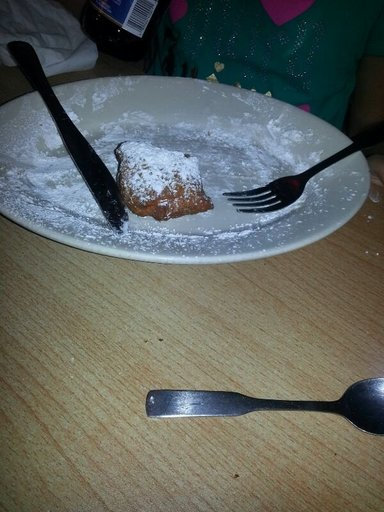

In [2]:
dataset[0]["image"]

In [4]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

In [6]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

dataset.set_transform(transforms)

In [7]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


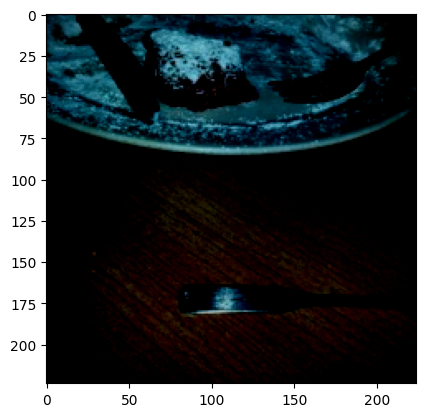

In [15]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))

In [10]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [12]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [13]:
small_train_dataset[0]
small_eval_dataset[0]

{'label': 2,
 'text': 'Kabuto is your run-of-the-mill Japanese Steakhouse. Different stations with chefs slinging shrimp tails around the communal dining areas like it\'s a lunchtime magic show. Always a plethora of laughs and gags going around the group. \\n\\nThis place is great for lunch. $9 and 30 minutes and you\'re out the door. Uhhh...If I\'m craving a salad with ginger dressing, which I always am, (you do too. admit it) fried rice, steak, shrimp and white sauce (DUDE) then Kabuto is king of lunch options in my book. Always super clean and full of kindhearted staff. The parking lot is super difficult to get in and out of though. 51 traffic at lunch is a beast. Good luck getting stuck behind someone trying to cut across traffic at 12pm on a weekday. It\'s murder. This place would greatly benefit from another exit/entrance or a stoplight. Here\'s hoping....\\n\\nYou can\'t really shake a stick at balanced lunch when you can have soup or a salad, veggies, fried rice and a choice of

In [14]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]='1'
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [16]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [17]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Detected kernel version 4.15.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.300333,0.439000
2,No log,0.982108,0.584000
3,No log,1.026244,0.589000


TrainOutput(global_step=375, training_loss=0.997599365234375, metrics={'train_runtime': 113.6152, 'train_samples_per_second': 26.405, 'train_steps_per_second': 3.301, 'total_flos': 789354427392000.0, 'train_loss': 0.997599365234375, 'epoch': 3.0})